# Improve eddy tracking

The objective of this script is to improve the eddy tracking and remove all the bugs found in the first stage of development. 

In [1]:
# Importing all libraries except trackeddy.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
from trackeddy.trackeddy import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *

In [5]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]
# Import velociry field
ncfileu=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_u.nc')
ncfilev=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_v.nc')
print ncfileu
lonu=ncfileu.variables['xu_ocean_sub01'][:]
latu=ncfileu.variables['yu_ocean_sub01'][:]
u=ncfileu.variables['u'][:,0,:,:]
v=ncfilev.variables['v'][:,0,:,:]

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    filename: rregionsouthern_ocean_daily_u.nc
    title: MOM5_CORE_NYF_50lvl_comparison_test
    grid_type: mosaic
    grid_tile: 1
    dimensions(sizes): xu_ocean_sub01(3600), yu_ocean_sub01(930), st_ocean(75), st_edges_ocean(76), time(90), nv(2)
    variables(dimensions): float64 xu_ocean_sub01(xu_ocean_sub01), float64 yu_ocean_sub01(yu_ocean_sub01), float64 st_ocean(st_ocean), float64 st_edges_ocean(st_edges_ocean), float64 time(time), float64 nv(nv), float32 u(time,st_ocean,yu_ocean_sub01,xu_ocean_sub01), float64 average_T1(time), float64 average_T2(time), float64 average_DT(time), float64 time_bounds(time,nv)
    groups: 



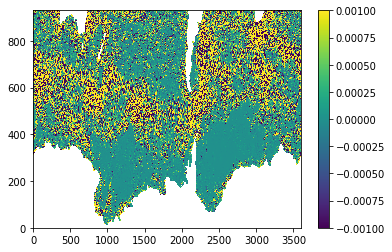

In [10]:
okubo=okuboweissparm(u,v,0)
pcolormesh(okubo,vmin=-0.001,vmax=0.001)
colorbar()

In [ ]:
areamap=array([[0,len(lon)],[600,len(lat)]])
levels=[-std(okubo),std(okubo)]
for ii in range(0,5):
    print ii
    ssha=okuboweissparm(u,v,ii)
    eddys=scan_eddym(ssha,lon,lat,levels,ii,areamap,destdir='',okparm='',diagnostics=False)
    if ii==0:
        eddytd=dict_eddyt(ii,eddys)
    else:
        eddytd=dict_eddyt(ii,eddys,eddytd) 

0
